In [45]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import warnings

# Dependency imports
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy as np
import pickle 


warnings.simplefilter(action="ignore")

IMAGE_SHAPE = [32, 32, 3]

### SAVE AND LOAD LOSSES PICKLES

In [46]:
loss_dir = 'losses/'

In [47]:
##LOAD LOSSES
with open (loss_dir+'adam', 'rb') as fp:
    adam = pickle.load(fp)
with open (loss_dir+'adagrad', 'rb') as fp:
    adagrad = pickle.load(fp)
with open (loss_dir+'misso', 'rb') as fp:
    misso = pickle.load(fp)

## PLOTS

In [48]:
def tsplotseveral(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','r','r','black']
    #colors=['y','b','g','r','black']
    colors=['lightyellow','lightskyblue','mistyrose','mistyrose','lightgrey']
    labels= ['MC-ADAM','MC-Adagrad','MISSO','MC-SAG','MC-Adadelta']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=3)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('Epoch', fontsize=axis_fontsize)
    plt.ylabel('Negated ELBO', fontsize=axis_fontsize)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(linestyle='dotted',linewidth=2)
    pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
    fig.tight_layout()
    #fig.show()
    #fig.savefig("resnetcifar.png",bbox_inches = 'tight')
    return _

In [49]:
len(adam[0])

195

In [50]:
len(misso[0])

195

In [51]:
iterations = len(adam[0])
iterations

195

### Real data plot CIFAR

In [52]:
itera = np.linspace(0,iterations,iterations)

In [53]:
figsize = (8, 4.5)
leg_fontsize= 16
axis_fontsize = 18

195

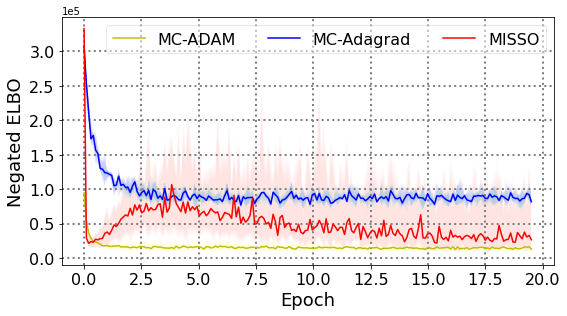

In [54]:
toplot = [adam,adagrad,misso]
tsplotseveral(itera/10,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

In [55]:
timeadam=31879
timeadagrad= 31675
timemisso= 32092

In [56]:
factoradam = round(timeadam/195) +1
factoradagrad = round(timeadagrad/195) +1
factormisso = round(timemisso/195) +1

In [57]:
xaxisadam = range(0,timeadam,factoradam)
xaxisadagrad = range(0,timeadagrad,factoradagrad)
xaxismisso = range(0,timemisso,factormisso)

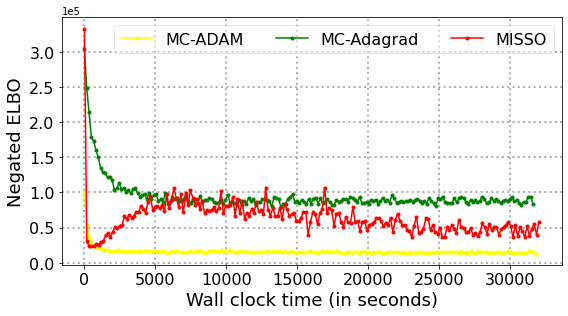

In [58]:
##TRAINING AND TESTING ACC
figsize = (8, 4.5)
leg_fontsize= 16
axis_fontsize = 18

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    
xaxis = range(len(np.mean(misso, axis=0)))
plt.tight_layout()
plt.plot(xaxisadam, np.mean(adam, axis=0)[0:len(xaxisadam)], label='MC-ADAM',color='yellow', linestyle='solid', marker = ".")
plt.plot(xaxisadagrad, np.mean(adagrad, axis=0)[0:len(xaxisadagrad)], label='MC-Adagrad',color='green', linestyle='solid', marker = ".")
plt.plot(xaxismisso, np.mean(misso, axis=0)[0:len(xaxismisso)], label='MISSO',color='red', linestyle='solid', marker = ".")

leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=3)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Wall clock time (in seconds)', fontsize=axis_fontsize)
plt.ylabel('Negated ELBO', fontsize=axis_fontsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)
pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
fig.savefig("resnet_vs_wallclock.png",bbox_inches = 'tight')
fig.tight_layout()

In [59]:
xaxisadam

range(0, 31879, 164)

In [60]:
import pandas as pd

In [61]:
import pandas as pd
dfadam = pd.DataFrame({'time': xaxisadam, 'value': np.mean(adam, axis=0)[0:len(xaxisadam)]})
dfadagrad = pd.DataFrame({'time': xaxisadagrad, 'value': np.mean(adagrad, axis=0)[0:len(xaxisadagrad)]})
dfmisso = pd.DataFrame({'time': xaxismisso, 'value': np.mean(misso, axis=0)[0:len(xaxismisso)]})
np.savetxt(r'adam.txt', dfadam.values, fmt='%1.3f')
np.savetxt(r'adagrad.txt', dfadagrad.values, fmt='%1.3f')
np.savetxt(r'misso.txt', dfmisso.values, fmt='%1.3f')